# Energy Point Selection

This notebook demonstrates how to seleect energy points that most identify Reference spectra.

In [45]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from selector.energy_point_selector import Selector

In [ ]:
Utils/ h

In [46]:
mpl.rcParams['font.family'] = ['sans-serif']
mpl.rcParams['font.sans-serif'] = ['Arial']

def read_tddft_spectrum_file(path):
    """Read spectrum file."""
    return np.loadtxt(path).T

def format_axis(ax, energyrange=(2145, 2175), fontsize=20):
    """Format axes for spectral viewing."""
    ax.set_yticks([])
    ax.set_xlim(energyrange)
    ax.set_xlabel('Energy (eV)', fontsize=fontsize)
    ax.set_xticklabels(np.array(ax.get_xticks(), dtype=int), fontsize=fontsize - 2)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.tick_params(direction='in', width=3, length=13, which='major')
    ax.tick_params(direction='in', width=2, length=7, which='minor')

# Load Reference Data
Read in example XANES spectra in `Data` folder.

In [12]:
Refs = []
for cid in [59, 105, 106]:
    spectrum = read_tddft_spectrum_file(f'Data/{cid}_xanes.processedspectrum')
    Energy = spectrum[0]
    Refs.append(spectrum[1])
Refs = np.array(Refs)

Visualize reference spectra

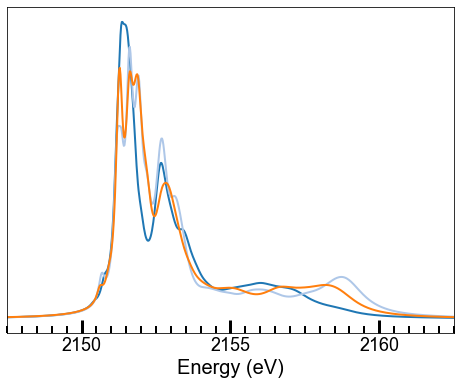

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
for i, ref in enumerate(Refs):
    ax.plot(Energy, ref, '-', linewidth=2, c=plt.cm.tab20(i))
format_axis(ax)
plt.show()

# Initialize Selector and perform selection algorithm

In [49]:
selector = Selector(Refs)

In [50]:
selector.select_energy_points()

3